In [2]:
# Importing data into Pandas dataframe and printing first 10 rows 
import pandas as pd
import matplotlib.pyplot as plt
office_df = pd.read_csv("datasets/office_episodes.csv")

print(office_df.head(10))


   episode_number  season      episode_title  \
0               0       1              Pilot   
1               1       1      Diversity Day   
2               2       1        Health Care   
3               3       1       The Alliance   
4               4       1         Basketball   
5               5       1           Hot Girl   
6               6       2        The Dundies   
7               7       2  Sexual Harassment   
8               8       2    Office Olympics   
9               9       2           The Fire   

                                         description  ratings  votes  \
0  The premiere episode introduces the boss and s...      7.5   4936   
1  Michael's off color remark puts a sensitivity ...      8.3   4801   
2  Michael leaves Dwight in charge of picking the...      7.8   4024   
3  Just for a laugh, Jim agrees to an alliance wi...      8.1   3915   
4  Michael and his staff challenge the warehouse ...      8.4   4294   
5  Michael is just one of the many male

In [3]:
# Initiatlize two empty lists
colors = []
sizes = []

# Iterate through the DataFrame, and assign colors based on the rating
for ind, row in office_df.iterrows(): 
    if row["scaled_ratings"] < 0.25:
        colors.append('red')
    elif row["scaled_ratings"] < 0.50:
        colors.append('orange')
    elif row["scaled_ratings"] < 0.75:
        colors.append('lightgreen')
    else:
        colors.append('darkgreen')  
       
 
 # Iterate through the DataFrame, and assign a size based on whether it has guests  
for ind, row in office_df.iterrows():
    if row["has_guests"] == True:
        sizes.append(250)
    else:
        sizes.append(25)  
        


In [4]:
# For ease of plotting, add our lists as columns to the DataFrame
office_df["colors"] = colors
office_df["sizes"] = sizes


In [5]:
# Split data into guest and non_guest DataFrames
office_guest_df = office_df[office_df["has_guests"] == True]
office_nonguest_df = office_df[office_df["has_guests"] == False]


Text(0, 0.5, 'Viewership (Millions)')

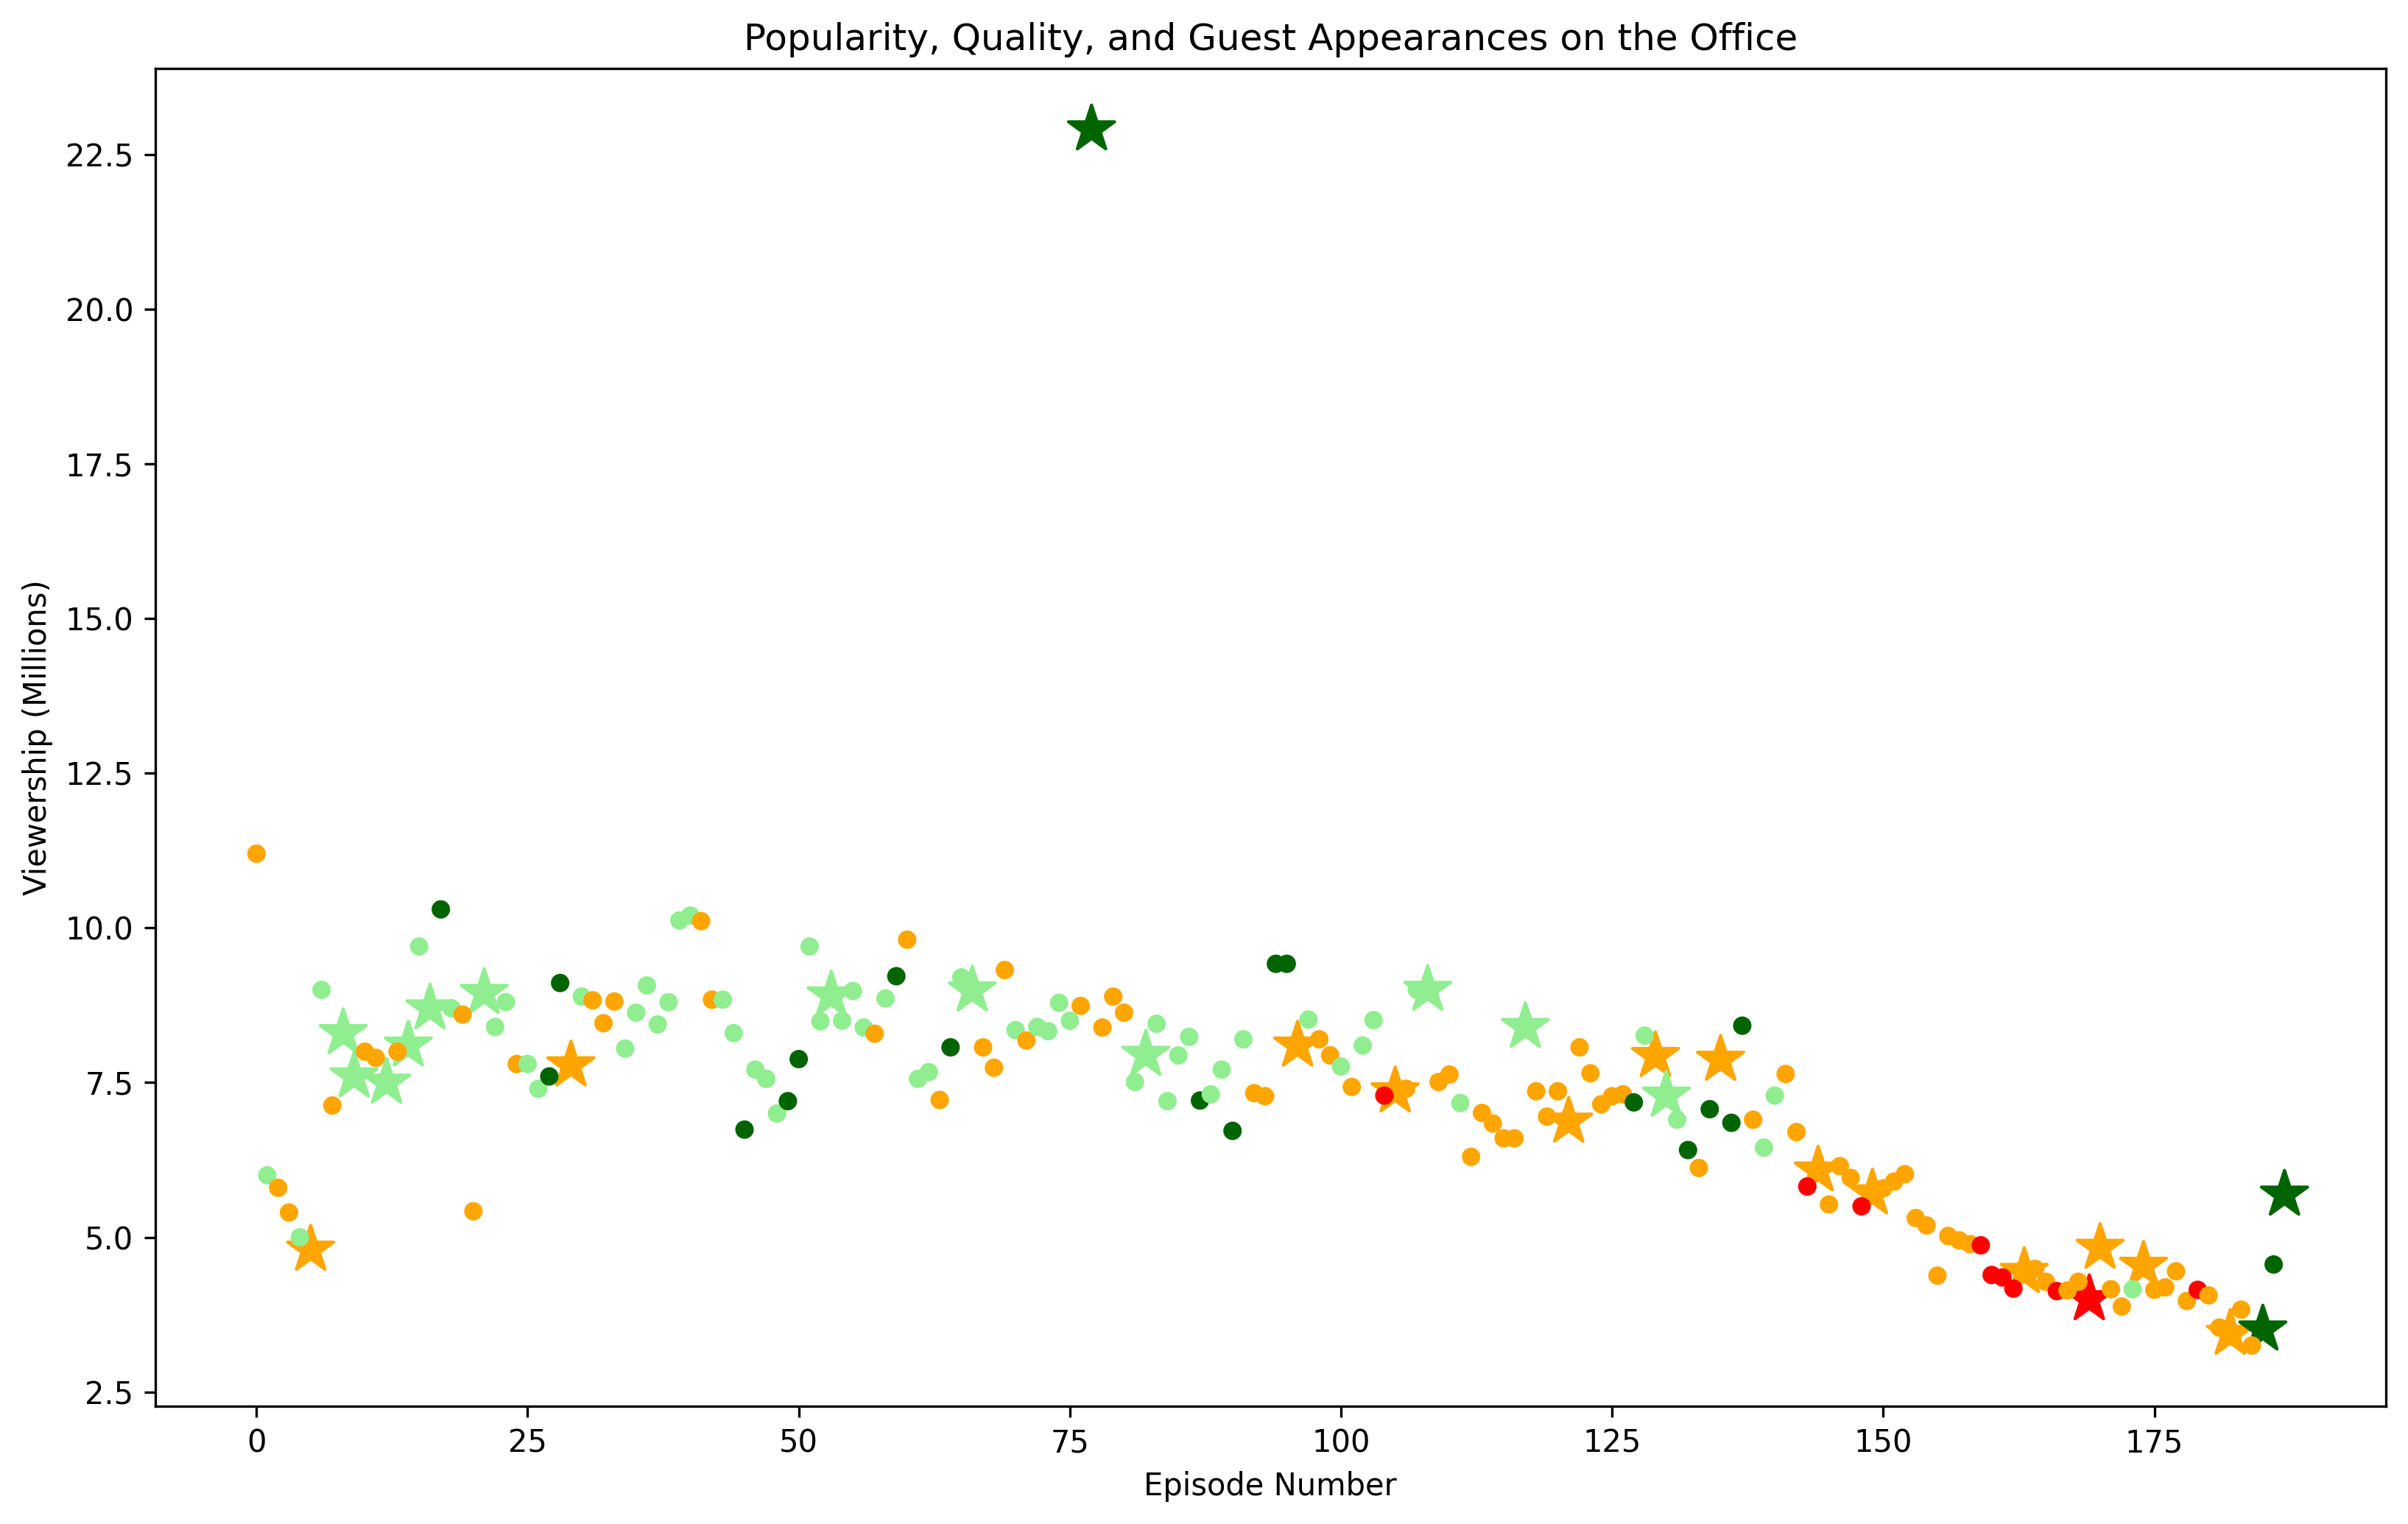

In [6]:
# Initializing the figure and axis object and selecting subsets of a dataframe 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize = (11,7), dpi = 300)

# Create two scatter plots with the episode number on the x axis, and the viewership on the y axis
ax.scatter(x=office_guest_df["episode_number"],
           y=office_guest_df["viewership_mil"],
           c=office_guest_df["colors"], 
           s=office_guest_df["sizes"],
           marker="*"
           )

ax.scatter(x=office_nonguest_df["episode_number"],
           y=office_nonguest_df["viewership_mil"],
           c=office_nonguest_df["colors"], 
           s=office_nonguest_df["sizes"]
           )

# Create title and labels
ax.set_title("Popularity, Quality, and Guest Appearances on the Office")
ax.set_xlabel("Episode Number")
ax.set_ylabel("Viewership (Millions)")

In [7]:
# Get the most popular guest star 
top_star = office_df.loc[office_df["viewership_mil"] == office_df["viewership_mil"].max(), "guest_stars"]
print(top_star)

77    Cloris Leachman, Jack Black, Jessica Alba
Name: guest_stars, dtype: object


## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>